In [54]:
import os
import torch
from torch import optim
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.fc1 = nn.Linear(4*4*64, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*64)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = SimpleCNN().to(device)

Using cuda device


In [47]:
# Load data
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

loaders = { 'train' : train_dataloader, 'test'  : test_dataloader }

In [42]:
print(training_data)
print(training_data.data.size())

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
torch.Size([60000, 28, 28])


Train data length: 938
Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.

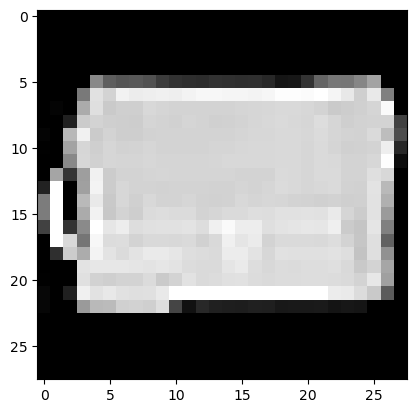

Label: 8


In [86]:
# print(test_dataloader)
train_features, train_labels = next(iter(train_dataloader))
print(f"Train data length: {len(train_dataloader)}")
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
print(img, img.size())
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [ ]:
print(model)
params = list(model.parameters())
print(params)
print(len(params))
print(params[0].size())

In [62]:
def train_CNN(num_epochs, cnn, loaders, device):
    cnn.train()
    loss_func = nn.CrossEntropyLoss()
    optimizer = optim.Adam(cnn.parameters(), lr = 0.01)

    for epoch in range(num_epochs):
        for batch_idx, (images, labels) in enumerate(loaders['train']):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            out = cnn(images)
            print(out)
            print(out.size())
            loss = loss_func(out, labels)
            loss.backward()
            optimizer.step()
 
            print(f"Epoch: {epoch+1}\tBatch ID: {batch_idx}\tLoss: {loss.item()}")
            print()
            break

train_CNN(7, model, loaders, device)

tensor([[-1.6859e-01, -9.7454e+00, -5.7444e+00, -4.8819e+00, -8.1835e+00,
         -1.8623e+01, -1.9378e+00, -2.2594e+01, -1.3001e+01, -1.9664e+01],
        [-4.6237e+00, -7.7954e+00, -1.3491e+00, -4.1533e+00, -9.7298e-01,
         -1.2633e+01, -1.0903e+00, -1.4183e+01, -7.5440e+00, -1.3932e+01],
        [-1.4773e+01, -1.3568e+01, -1.1551e+01, -1.2694e+01, -1.3918e+01,
         -3.7952e+00, -1.0966e+01, -2.5908e-01, -8.6387e+00, -1.5821e+00],
        [-5.1153e+00, -2.0861e-02, -7.3023e+00, -5.2862e+00, -6.4671e+00,
         -1.3130e+01, -4.9131e+00, -2.2266e+01, -1.5192e+01, -1.7619e+01],
        [-5.8768e+00, -4.8998e+00, -7.5047e+00, -4.2805e+00, -1.3351e+01,
         -1.3190e+00, -7.3735e+00, -5.1972e+00, -4.0343e+00, -3.7963e-01],
        [-1.1722e+01, -9.8387e+00, -9.9882e+00, -1.0445e+01, -1.1890e+01,
         -2.5756e+00, -9.1792e+00, -1.5660e-01, -7.4276e+00, -2.6881e+00],
        [-1.0147e+01, -9.1158e+00, -7.2487e+00, -7.9718e+00, -6.0502e+00,
         -3.4610e+00, -6.1672e+0

In [77]:
def test_CNN(cnn, loaders, device):
    cnn.eval()
    correct = 0
    total = 0
    with torch.no_grad():  # No need to track gradients in testing phase
        for images, labels in loaders['test']:
            images, labels = images.to(device), labels.to(device)
            outputs = cnn(images)
            _, predicted = torch.max(outputs.data, 1) # returns max values, index of max values
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy of the model on test images: {100 * correct / total}% on {total} values')
    
test_CNN(model, loaders, device)

Accuracy of the model on test images: 72.07% on 10000 values
